<a href="https://colab.research.google.com/github/SudevSamuel07/Music-Genre-Lyric-Analyzer/blob/main/feature_extractor_py_(with_KaggleHub).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import json
import os
import math
import librosa
import kagglehub

# --- Automated Dataset Download ---
# This will download the GTZAN dataset from KaggleHub to the Colab environment.
print("Downloading GTZAN dataset...")
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")
print(f"Dataset downloaded to: {path}")

# The path to the genres folder inside the downloaded dataset
DATASET_PATH = os.path.join(path, "Data", "genres_original")
# Path to save the extracted features
JSON_PATH = "data.json"

SAMPLE_RATE = 22050
TRACK_DURATION = 30  # measured in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION


def save_mfcc(dataset_path, json_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    """Extracts MFCCs from music dataset and saves them into a json file along with genre labels.

    :param dataset_path (str): Path to dataset
    :param json_path (str): Path to json file used to save MFCCs
    :param num_mfcc (int): Number of coefficients to extract
    :param n_fft (int): Interval we consider to apply FFT. Measured in # of samples
    :param hop_length (int): Sliding window for FFT. Measured in # of samples
    :param: num_segments (int): Number of segments we want to divide sample tracks into
    """

    # dictionary to store mapping, labels, and MFCCs
    data = {
        "mapping": [],
        "labels": [],
        "mfcc": []
    }

    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = math.ceil(samples_per_segment / hop_length)

    # loop through all genre sub-folder
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):

        # ensure we're processing a genre sub-folder level
        if dirpath is not dataset_path:

            # save genre label (i.e., sub-folder name) in the mapping
            semantic_label = os.path.basename(dirpath)
            data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # process all audio files in genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)

                # Check if the file is a valid audio file before processing
                if not f.endswith(('.wav', '.au', '.mp3')):
                    continue

                try:
                    signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                except Exception as e:
                    print(f"Could not load file {file_path}: {e}")
                    continue


                # process all segments of audio file
                for d in range(num_segments):

                    # calculate start and finish sample for current segment
                    start = samples_per_segment * d
                    finish = start + samples_per_segment

                    # extract mfcc
                    mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
                    mfcc = mfcc.T

                    # store only mfcc feature with expected number of vectors
                    if len(mfcc) == num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, d+1))

    # save MFCCs to json file
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    # Note: You might need to authenticate with your Kaggle account in Colab
    # from google.colab import userdata
    # os.environ["KAGGLE_USERNAME"] = userdata.get('KAGGLE_USERNAME')
    # os.environ["KAGGLE_KEY"] = userdata.get('KAGGLE_KEY')

    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)

Streaming output truncated to the last 5000 lines.
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00037.wav, segment:10
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00039.wav, segment:1
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00039.wav, segment:2
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00039.wav, segment:3
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00039.wav, segment:4
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00039.wav, segment:5
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00039.wav, segment:6
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00039.wav, segment:7
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/

/tmp/ipython-input-2293112291.py:66: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Could not load file /kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav: 
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:1
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:2
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:3
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:4
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:5
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:6
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:7
/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00041.wav, segment:8
/kaggle/input/gtzan-datase

--- Starting Model Training ---
Data successfully loaded!


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 62, 4, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 31, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 1, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 15, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,514 (177.79 KB)

 Trainable params: 45,322 (177.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 64ms/step - accuracy: 0.1553 - loss: 2.8994 - val_accuracy: 0.3311 - val_loss: 1.8634
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 64ms/step - accuracy: 0.3148 - loss: 1.9742 - val_accuracy: 0.4426 - val_loss: 1.5476
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 65ms/step - accuracy: 0.4010 - loss: 1.6854 - val_accuracy: 0.4800 - val_loss: 1.4196
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4397 - loss: 1.5458 - val_accuracy: 0.5287 - val_loss: 1.3284
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 63ms/step - accuracy: 0.4645 - loss: 1.4486 - val_accuracy: 0.5601 - val_loss: 1.2713
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step - accuracy: 0.4989 - loss: 1.3714 - val_accuracy: 0.5828 - val_loss: 1.2143
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 57ms/step - accuracy: 0.5106 - loss: 1.3331 - val_accuracy: 0.5848 - val_loss: 1.1882
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 21s 62ms/step - accuracy: 0.5536 - loss: 1.2479 - 

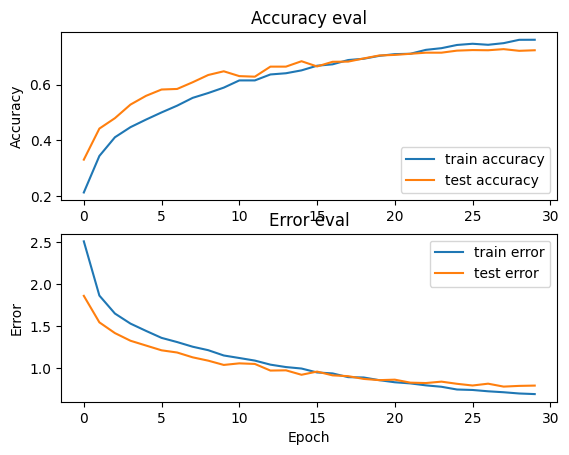

79/79 - 1s - 12ms/step - accuracy: 0.6996 - loss: 0.8580



Test accuracy: 0.6996395587921143

Model saved successfully to genre_classifier.h5

--- Predicting Genre for New Song ---

Processing /content/Sapphire (Mp3 Song)-(SambalpuriStar.In).mp3...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step

Predicted Genre: disco


In [4]:
import json
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import librosa

# --- Global Paths and Parameters ---

# Path to the JSON file that stores MFCCs and genre labels
DATA_PATH = "data.json"
# Path to save/load the trained model
MODEL_PATH = "genre_classifier.h5"
# Path to the new audio file you want to predict
AUDIO_PATH = "/content/Sapphire (Mp3 Song)-(SambalpuriStar.In).mp3"

# Audio processing parameters
SAMPLE_RATE = 22050
TRACK_DURATION = 30  # in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

# --- Functions for Data Loading and Training ---

def load_data(data_path):
    """Loads training dataset from json file."""
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    print("Data successfully loaded!")
    return X, y

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs."""
    fig, axs = plt.subplots(2)
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets."""
    X, y = load_data(DATA_PATH)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):
    """Generates CNN model."""
    model = keras.Sequential()
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# --- Functions for Prediction ---

def load_genre_mapping(json_path):
    """Loads the genre mapping from the json file."""
    with open(json_path, "r") as fp:
        data = json.load(fp)
    return data["mapping"]

def process_audio(audio_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    """Extracts MFCCs from a single audio file."""
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = np.ceil(samples_per_segment / hop_length)
    try:
        signal, sample_rate = librosa.load(audio_path, sr=SAMPLE_RATE)
    except Exception as e:
        print(f"Could not load file {audio_path}: {e}")
        return None
    all_mfccs = []
    for d in range(num_segments):
        start = samples_per_segment * d
        finish = start + samples_per_segment
        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T
        if len(mfcc) == num_mfcc_vectors_per_segment:
            all_mfccs.append(mfcc.tolist())
    return np.array(all_mfccs)

def predict_genre(model, audio_features, genre_mapping):
    """Predicts the genre of an audio file using a majority vote over its segments."""
    audio_features = audio_features[..., np.newaxis]
    predictions = model.predict(audio_features)
    predicted_indices = np.argmax(predictions, axis=1)
    most_common_prediction_index = np.bincount(predicted_indices).argmax()
    predicted_genre = genre_mapping[most_common_prediction_index]
    return predicted_genre


if __name__ == "__main__":

    # --- Part 1: Train the Model ---
    print("--- Starting Model Training ---")
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)
    plot_history(history)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # Save the trained model
    model.save(MODEL_PATH)
    print(f"\nModel saved successfully to {MODEL_PATH}")

    # --- Part 2: Predict on Your Song ---
    print("\n--- Predicting Genre for New Song ---")
    genre_mapping = load_genre_mapping(DATA_PATH)
    print(f"\nProcessing {AUDIO_PATH}...")
    audio_features = process_audio(AUDIO_PATH)

    if audio_features is not None and audio_features.shape[0] > 0:
        predicted_genre = predict_genre(model, audio_features, genre_mapping)
        print(f"\nPredicted Genre: {predicted_genre}")
    else:
        print("Could not extract features from the audio file. Please check the file path and format.")



In [5]:
!pip install git+https://github.com/openai/whisper.git
!sudo apt-get install -y ffmpeg


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-pyr1bjn2
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-pyr1bjn2
  Resolved https://github.com/openai/whisper.git to commit c0d2f624c09dc18e709e37c2ad90c039a4eb72a2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.7 MB/s eta 0:00:00
   ━━━━

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


--- Starting Model Training ---
Data successfully loaded!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 11, 32)    │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 6, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 6, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 4, 32)      │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 31, 2, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 31, 2, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 30, 1, 32)      │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 1, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 15, 1, 32)      │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 480)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        30,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,514 (177.79 KB)

 Trainable params: 45,322 (177.04 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 17s 66ms/step - accuracy: 0.1721 - loss: 2.6903 - val_accuracy: 0.3471 - val_loss: 1.8682
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 66ms/step - accuracy: 0.3156 - loss: 1.9695 - val_accuracy: 0.4179 - val_loss: 1.5946
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 20s 65ms/step - accuracy: 0.3854 - loss: 1.7477 - val_accuracy: 0.4686 - val_loss: 1.4704
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 13s 69ms/step - accuracy: 0.4342 - loss: 1.5920 - val_accuracy: 0.4947 - val_loss: 1.3968
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 80ms/step - accuracy: 0.4738 - loss: 1.4765 - val_accuracy: 0.5194 - val_loss: 1.3238
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 19s 71ms/step - accuracy: 0.4968 - loss: 1.3987 - val_accuracy: 0.5360 - val_loss: 1.2759
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 16s 83ms/step - accuracy: 0.5114 - loss: 1.3529 - val_accuracy: 0.5594 - val_loss: 1.2228
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 14s 74ms/step - accuracy: 0.5330 - loss: 1.3067 - 

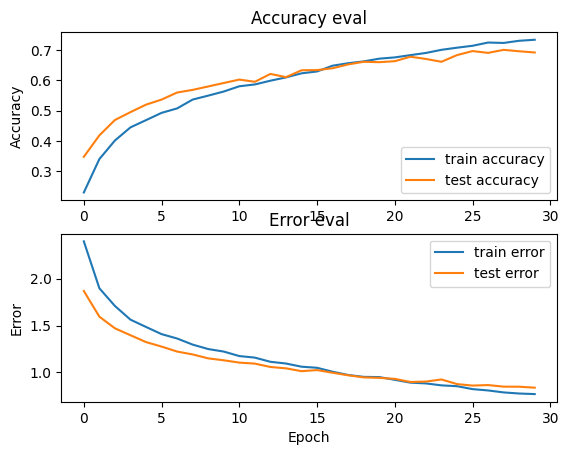

79/79 - 1s - 12ms/step - accuracy: 0.7024 - loss: 0.8647



Test accuracy: 0.7024429440498352

Model saved successfully to genre_classifier.h5

--- Analyzing New Song ---

Processing /content/Sapphire (Mp3 Song)-(SambalpuriStar.In).mp3 for genre classification...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step

--- Transcribing Lyrics with Whisper ---


100%|████████████████████████████████████████| 139M/139M [00:00<00:00, 175MiB/s]
/usr/local/lib/python3.11/dist-packages/whisper/transcribe.py:132: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


Transcription successful!


--- FINAL ANALYSIS ---
Predicted Genre: pop
Transcribed Lyrics:  You're glowing, you're covering fracture the light You can't help but shine, and I know that You carry the world on your back, but look at you tonight The lights, your face, your eyes, exploding like fire Waxing the sky, set fire Don't you know your body, why you pushing on me? Don't you and the body, I can do this all week Who be dancing to the morning or the baby won't sleep? Don't much, don't much, don't much, just sit down and body, why you pushing on me? Don't you and the body, I can do this all week Who be dancing to the morning or the baby won't sleep? Don't much, don't much, don't much, just sit down and body, why you pushing on me? Look what we found, come and reach down Into our hearts and pull us through our feet now You know the truth is, we could disappear Anywhere, as long as I got you there When the sun dies, till the day shines When I'm with you, it's not enough time You're on m

In [1]:
import json
import numpy as np
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import librosa
import whisper # New import for transcription

# --- Global Paths and Parameters ---

# Path to the JSON file that stores MFCCs and genre labels
DATA_PATH = "data.json"
# Path to save/load the trained model
MODEL_PATH = "genre_classifier.h5"
# Path to the new audio file you want to predict
AUDIO_PATH = "/content/Sapphire (Mp3 Song)-(SambalpuriStar.In).mp3"

# Audio processing parameters
SAMPLE_RATE = 22050
TRACK_DURATION = 30  # in seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * TRACK_DURATION

# --- Functions for Data Loading and Training (Unchanged) ---

def load_data(data_path):
    """Loads training dataset from json file."""
    with open(data_path, "r") as fp:
        data = json.load(fp)
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    print("Data successfully loaded!")
    return X, y

def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs."""
    fig, axs = plt.subplots(2)
    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")
    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")
    plt.show()

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets."""
    X, y = load_data(DATA_PATH)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]
    return X_train, X_validation, X_test, y_train, y_validation, y_test

def build_model(input_shape):
    """Generates CNN model."""
    model = keras.Sequential()
    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))
    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

# --- Functions for Prediction and Transcription ---

def load_genre_mapping(json_path):
    """Loads the genre mapping from the json file."""
    with open(json_path, "r") as fp:
        data = json.load(fp)
    return data["mapping"]

def process_audio(audio_path, num_mfcc=13, n_fft=2048, hop_length=512, num_segments=10):
    """Extracts MFCCs from a single audio file."""
    samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    num_mfcc_vectors_per_segment = np.ceil(samples_per_segment / hop_length)
    try:
        signal, sample_rate = librosa.load(audio_path, sr=SAMPLE_RATE)
    except Exception as e:
        print(f"Could not load file {audio_path}: {e}")
        return None
    all_mfccs = []
    for d in range(num_segments):
        start = samples_per_segment * d
        finish = start + samples_per_segment
        mfcc = librosa.feature.mfcc(y=signal[start:finish], sr=sample_rate, n_mfcc=num_mfcc, n_fft=n_fft, hop_length=hop_length)
        mfcc = mfcc.T
        if len(mfcc) == num_mfcc_vectors_per_segment:
            all_mfccs.append(mfcc.tolist())
    return np.array(all_mfccs)

def predict_genre(model, audio_features, genre_mapping):
    """Predicts the genre of an audio file using a majority vote over its segments."""
    audio_features = audio_features[..., np.newaxis]
    predictions = model.predict(audio_features)
    predicted_indices = np.argmax(predictions, axis=1)
    most_common_prediction_index = np.bincount(predicted_indices).argmax()
    predicted_genre = genre_mapping[most_common_prediction_index]
    return predicted_genre

def transcribe_audio(audio_path):
    """Transcribes the audio file to text using the Whisper ASR model."""
    print("\n--- Transcribing Lyrics with Whisper ---")
    try:
        # Load the base Whisper model
        model = whisper.load_model("base")

        # Transcribe the audio file
        result = model.transcribe(audio_path)
        lyrics = result["text"]

        print("Transcription successful!")
        return lyrics
    except Exception as e:
        print(f"Could not transcribe audio: {e}")
        return "Lyrics could not be transcribed."


if __name__ == "__main__":

    # --- Part 1: Train the Genre Classification Model ---
    print("--- Starting Model Training ---")
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)
    plot_history(history)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # Save the trained model
    model.save(MODEL_PATH)
    print(f"\nModel saved successfully to {MODEL_PATH}")

    # --- Part 2: Analyze Your Song ---
    print("\n--- Analyzing New Song ---")
    genre_mapping = load_genre_mapping(DATA_PATH)
    print(f"\nProcessing {AUDIO_PATH} for genre classification...")
    audio_features = process_audio(AUDIO_PATH)

    predicted_genre = "Not determined"
    if audio_features is not None and audio_features.shape[0] > 0:
        predicted_genre = predict_genre(model, audio_features, genre_mapping)
    else:
        print("Could not extract features for genre classification.")

    # Transcribe the lyrics from the same audio file
    transcribed_lyrics = transcribe_audio(AUDIO_PATH)

    # --- Part 3: Final Combined Output ---
    print("\n\n--- FINAL ANALYSIS ---")
    print(f"Predicted Genre: {predicted_genre}")
    print(f"Transcribed Lyrics: {transcribed_lyrics}")

